<a href="https://colab.research.google.com/github/RusnaAida24/EcommerceAnalysis/blob/main/Ecommerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ecommerce Analysis

Data Source: https://www.kaggle.com/datasets/ybifoundation/ecommerce-visualization

Importing Libraries and Uploading dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
# Load data into a Pandas DataFrame
df = pd.read_csv('/content/data-2.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Exploratory Data Analysis (EDA)


In [3]:
# Columns' name
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
# Number of rows and columns
shapedf=df.shape
print("Rows:",shapedf[0])
print("Columns:",shapedf[1])

Rows: 541909
Columns: 8


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Maximum quantity ordered is about 74,215.
The highest unit price is 38,970 with the lowest value is questionable whether it is true or not.
There are negative values in quantity and unitprice, which is quite impossible. Hence we will look further on this.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 541909, dtype: object

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Handle Missing Values

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
(117*100)/shapedf[0]

0.02159034081367905

Since the null values in description column is not more than 10%, we will delete the rows with null values.

In [11]:
df.dropna(subset=['Description'], inplace=True)
df.dropna(subset=['UnitPrice'], inplace=True)
df.dropna(subset=['Country'], inplace=True)

In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In order to work on 'InvoiceDate' column more productive, we are converting the column to a datetime object.

In [13]:
df['InvoiceDate']= df['InvoiceDate'].astype('datetime64[ns]')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.isocalendar().day
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,3,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,3,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,8


In [15]:
df["InvoiceYear"].value_counts()

2011    498099
2010     42356
Name: InvoiceYear, dtype: int64

<Axes: xlabel='InvoiceYear', ylabel='count'>

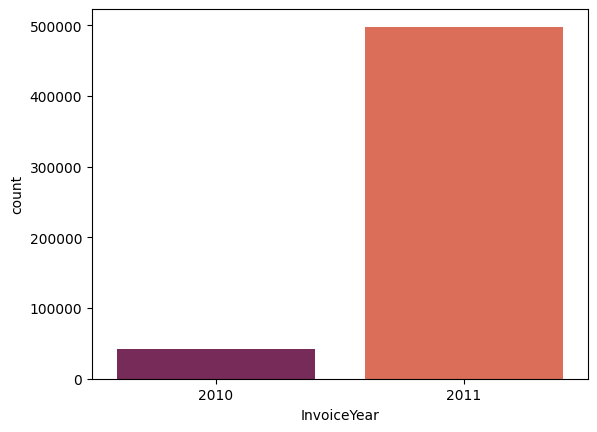

In [16]:
import seaborn as sns
sns.countplot(data= df, x= 'InvoiceYear', palette="rocket")

<Axes: xlabel='InvoiceDay', ylabel='count'>

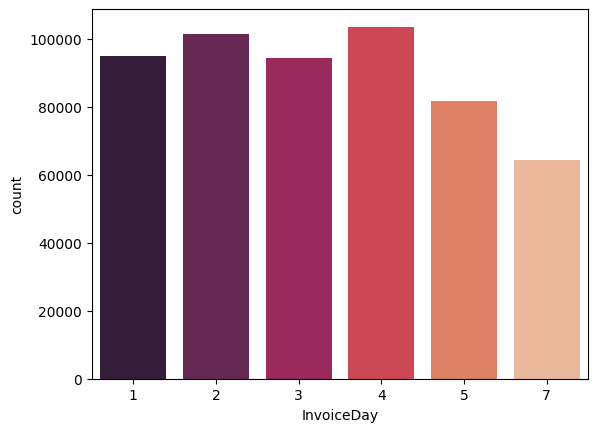

In [17]:
sns.countplot(data=df, x='InvoiceDay' , palette="rocket")

<Axes: xlabel='InvoiceMonth', ylabel='count'>

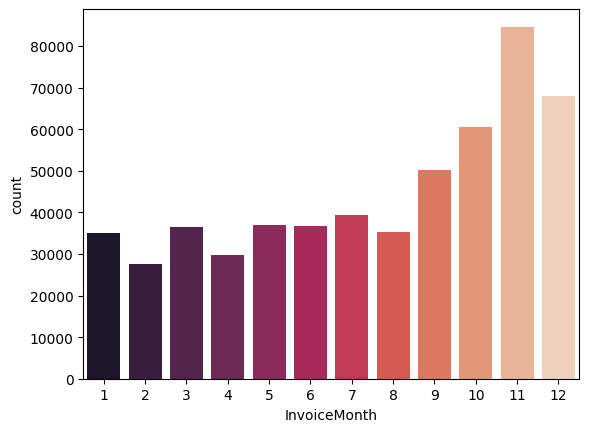

In [18]:
sns.countplot(data=df, x='InvoiceMonth', palette="rocket")

<Axes: xlabel='InvoiceHour', ylabel='count'>

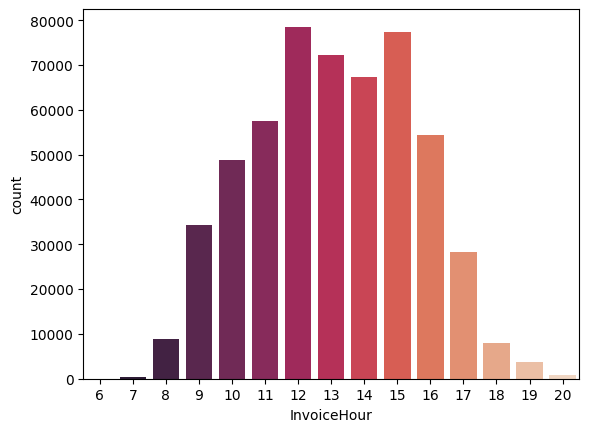

In [19]:
sns.countplot(data=df, x='InvoiceHour' , palette="rocket")

In [20]:
df.groupby(by='Country').sum()['Quantity'].sort_values(ascending=False)

<ipython-input-20-b15c35a0bffc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Country').sum()['Quantity'].sort_values(ascending=False)


Country
United Kingdom          4277438
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


Orders are mostly from United Kingdom followed by Netherlands and EIRE


In [21]:
df[df['InvoiceYear'] == 2010]['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain'], dtype=object)

In [22]:
df[df['InvoiceYear'] == 2011]['Country'].unique()

array(['United Kingdom', 'Sweden', 'Italy', 'Portugal', 'France',
       'Belgium', 'Bahrain', 'Germany', 'EIRE', 'Australia', 'Spain',
       'Japan', 'Israel', 'Cyprus', 'Netherlands', 'Poland',
       'Switzerland', 'Finland', 'Greece', 'Hong Kong', 'Singapore',
       'Iceland', 'Channel Islands', 'Lebanon', 'Austria', 'Norway',
       'United Arab Emirates', 'Denmark', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [23]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [24]:
df['Revenue']=df['Quantity']*df['UnitPrice']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,3,8,22.00


Text(0.5, 1.0, 'Country-wise Revenue Sum')

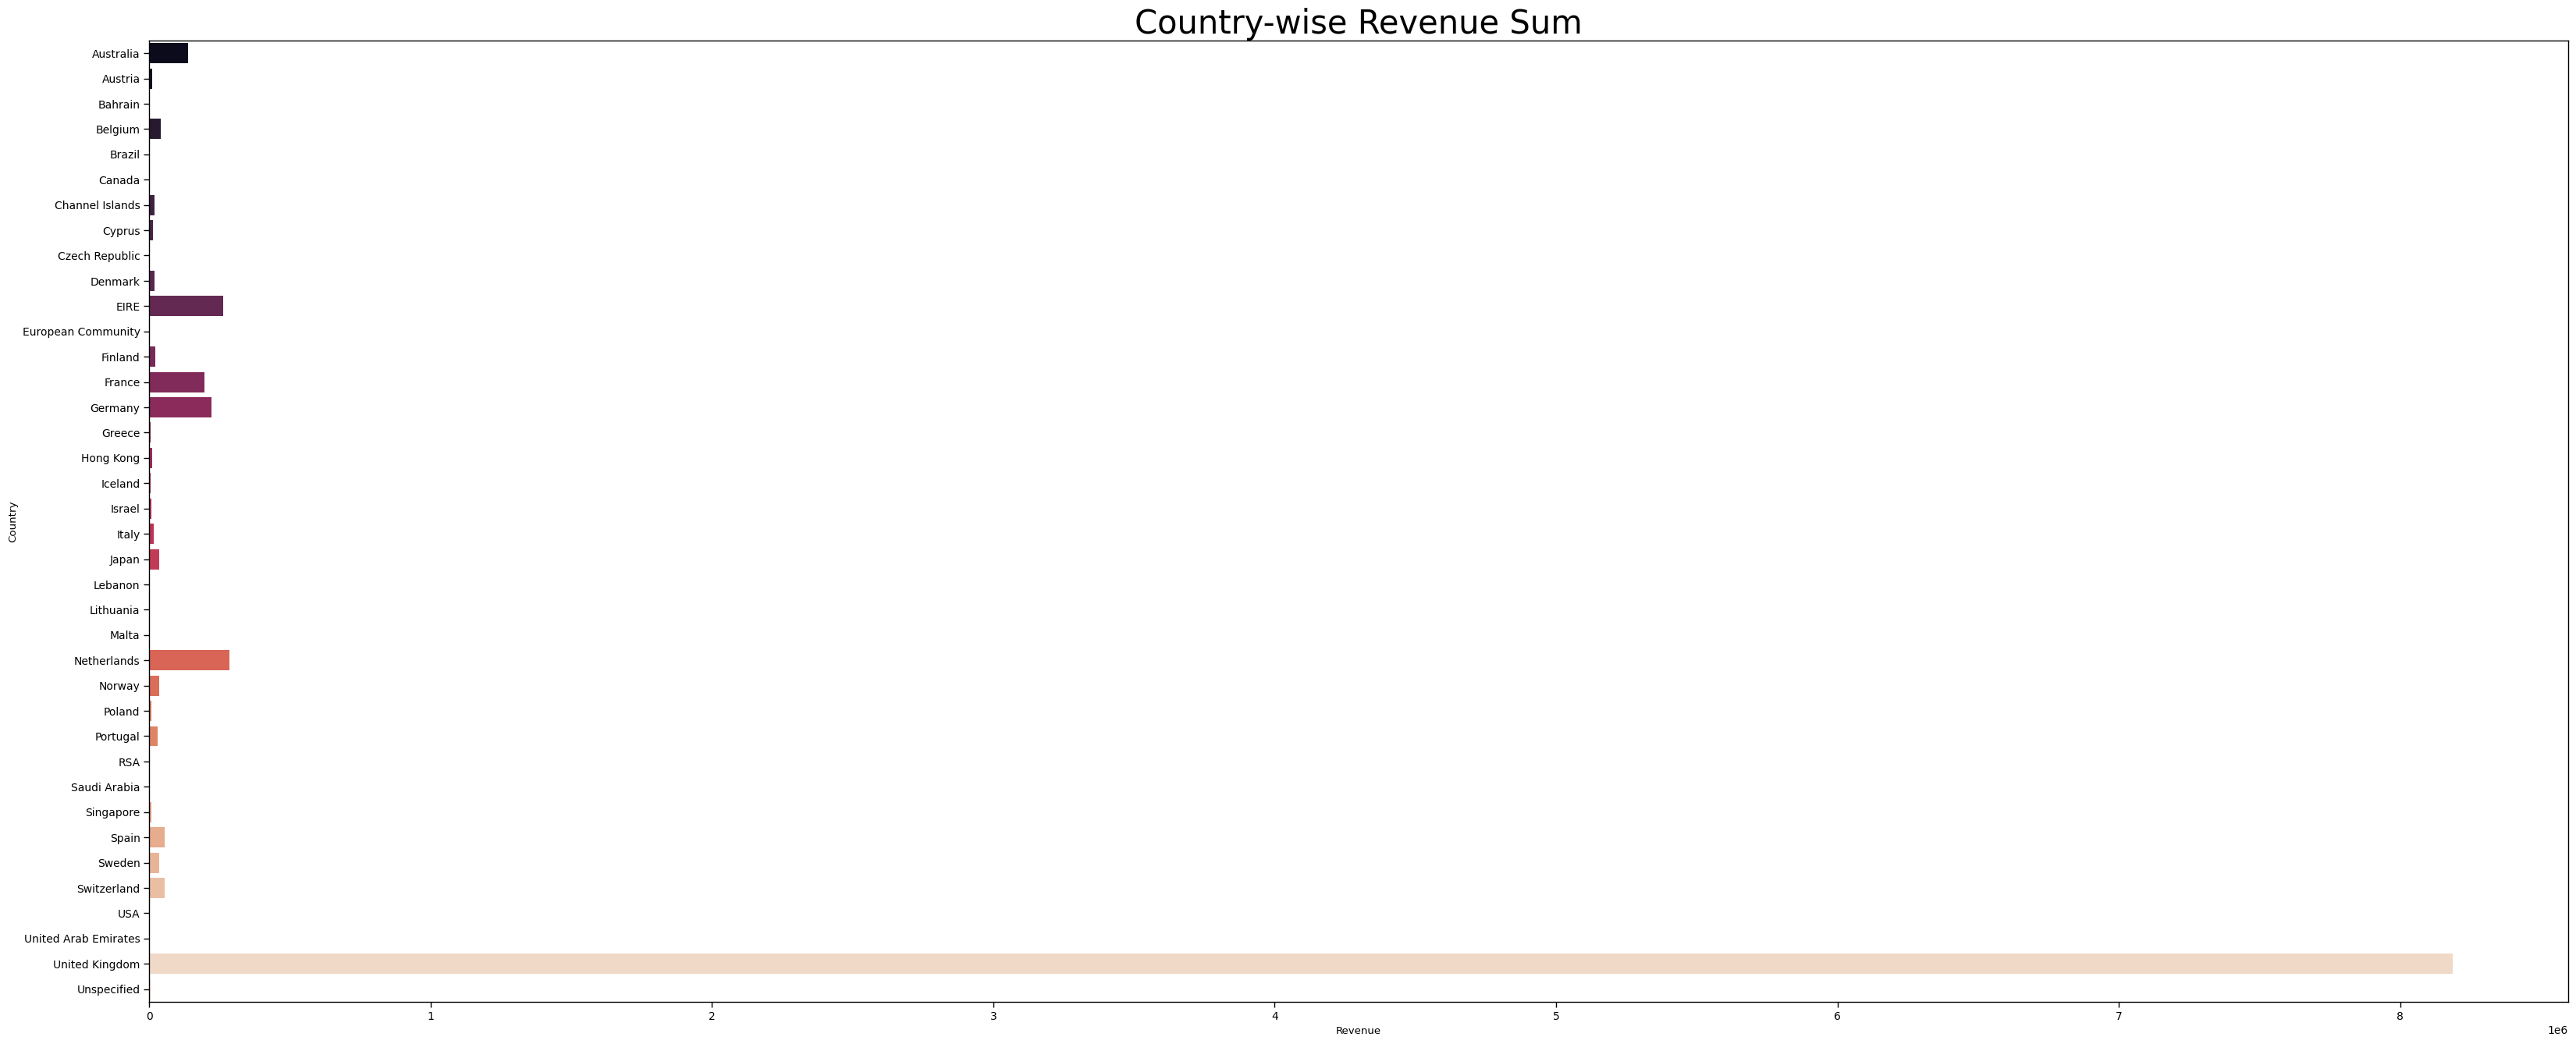

In [25]:
# Group by 'Country' and calculate the sum of 'Revenue' for each country
sum_revenue_by_country = df.groupby('Country')['Revenue'].sum().reset_index()

# Set the font size and adjust spacing before creating the plot
sns.set_context("paper", rc={"font.size": 20, "xtick.labelsize": 10, "ytick.labelsize": 10, "axes.ymargin": 0.1})
sns.color_palette("rocket")

# Plotting horizontal bar plot
plt.figure(figsize=(40, 16))
sns.barplot(x='Revenue', y='Country', data=sum_revenue_by_country, palette="rocket")
plt.title('Country-wise Revenue Sum', fontsize=30)

Text(0.5, 1.0, 'wise_Description_revenue Sum')

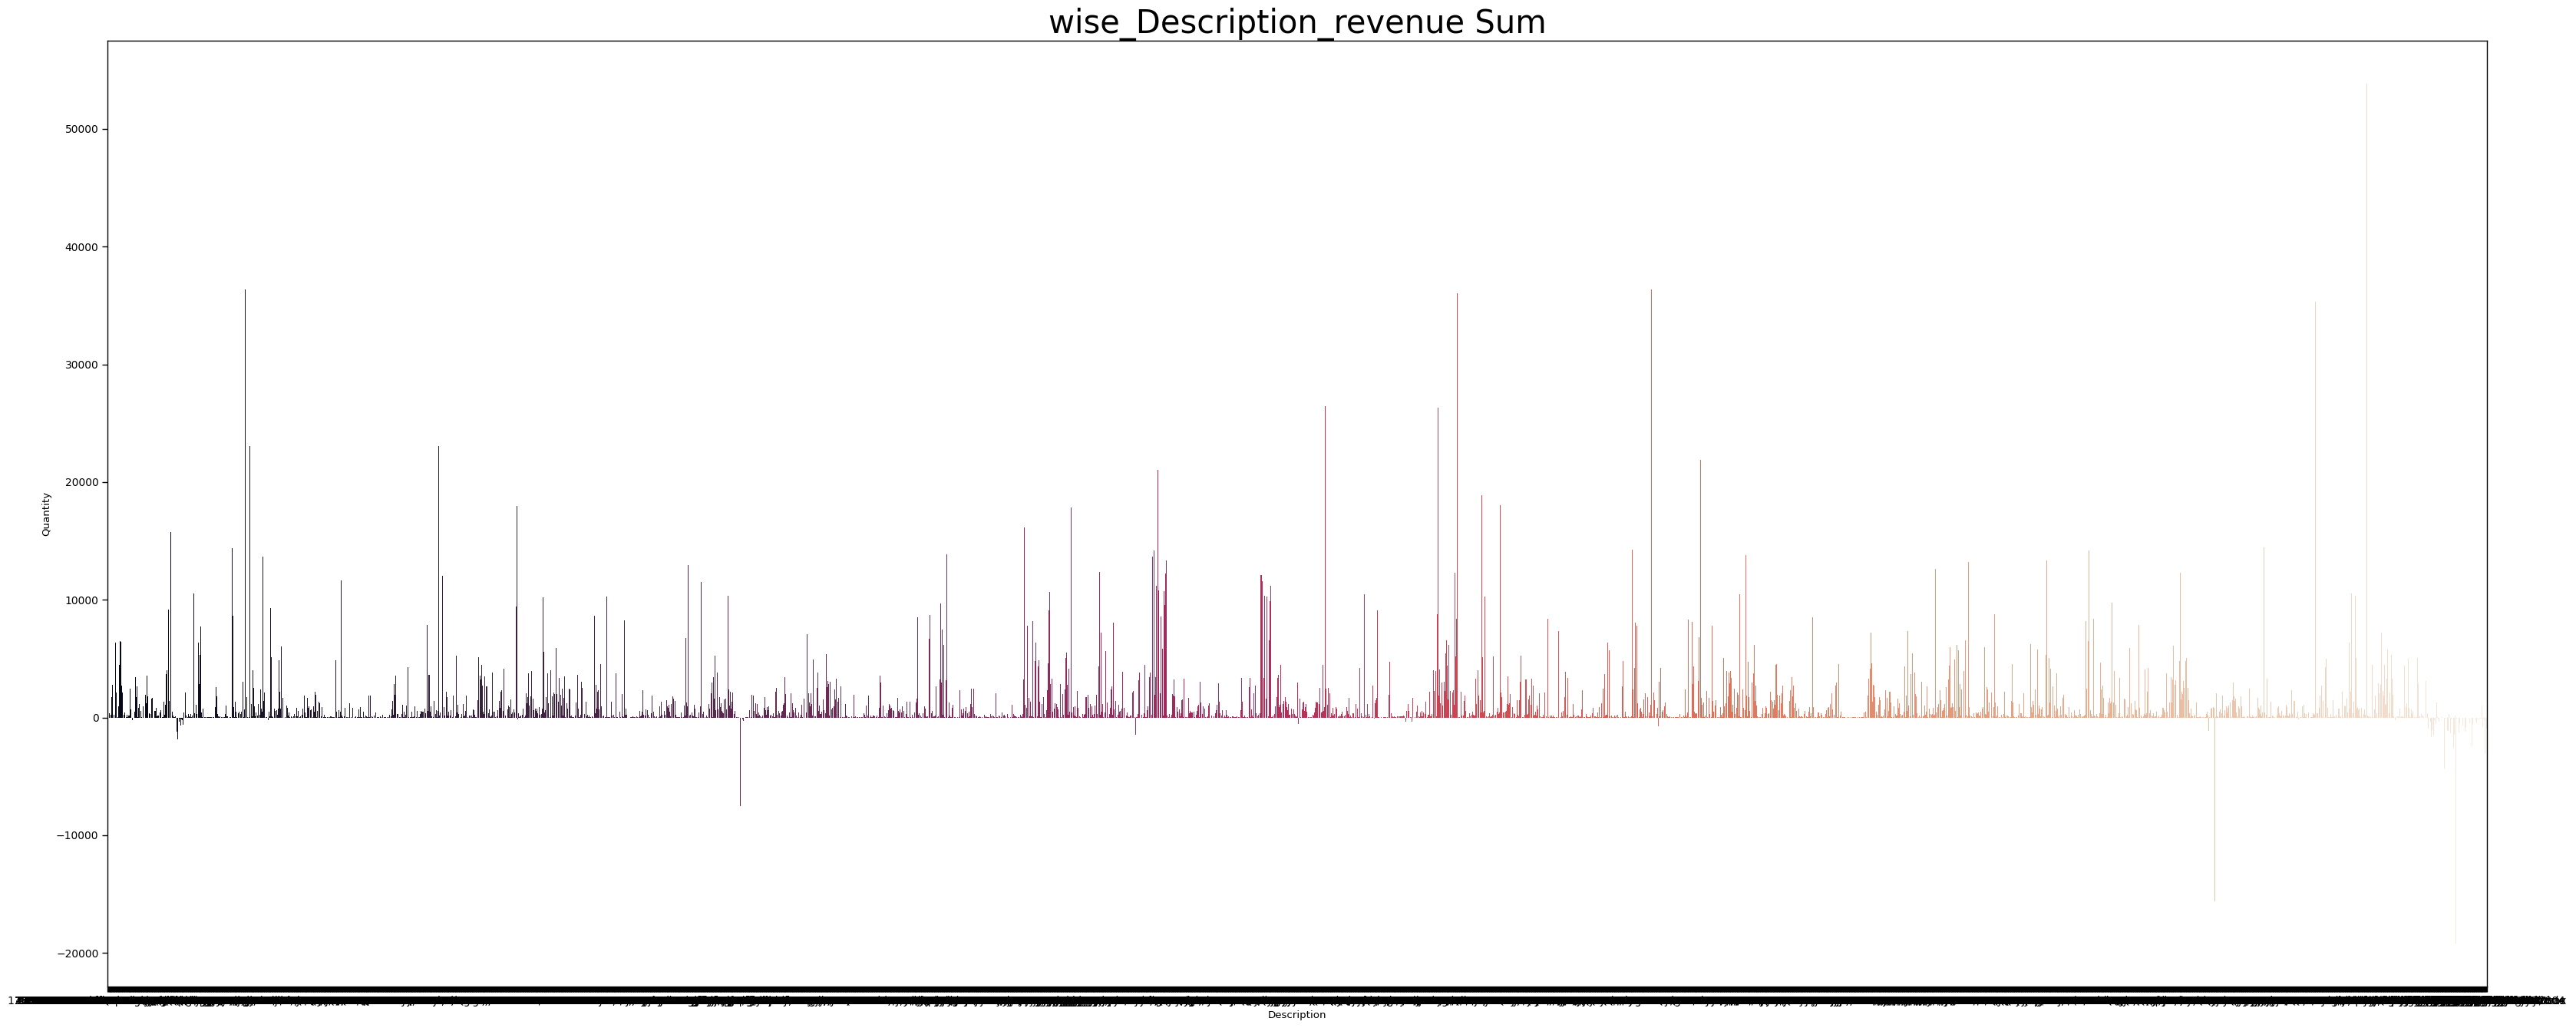

In [26]:
# Group by 'Country' and calculate the sum of 'Revenue' for each country
sum_quantity_by_prod_description = df.groupby('Description')['Quantity'].sum().reset_index()

# Set the font size and adjust spacing before creating the plot
sns.set_context("paper", rc={"font.size": 20, "xtick.labelsize": 10, "ytick.labelsize": 10, "axes.ymargin": 0.1})
sns.color_palette("rocket")

# Plotting horizontal bar plot
plt.figure(figsize=(40, 16))
sns.barplot(x='Description', y='Quantity', data=sum_quantity_by_prod_description, palette="rocket")
plt.title('wise_Description_revenue Sum', fontsize=30)

Large data in Python can be inconvenient since it takes long time to process, and the graph cannot show the thing that we want to understand. Since we already finish EDA part using python, now, let's look into Tableau.<br><br>

Before that,<br>

Some good questions:<br>

1) What are the minimum value for quantity and unitprice. <br>
2) Why customers mostly from United Kingdom, is it because of the shop location? Can we apply the same factor that happen to UK to other countries so that other can be regular customer as well.<br>
3) Invoiceyear for 2011 is higher than the one in 2010. What are the changes made during this one year. Can we apply the same thing for this year to get highest for invoiceyear.<br>

Identifying outliers

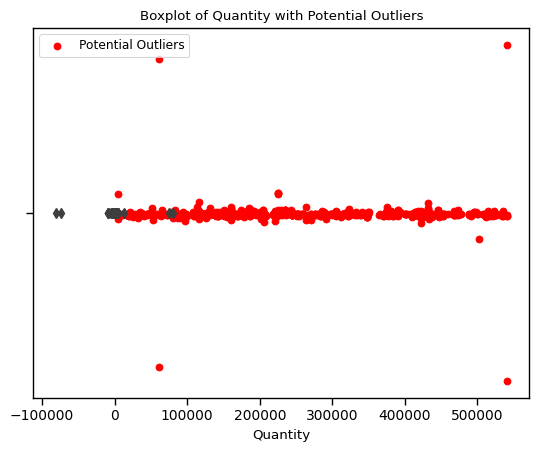

In [27]:
from scipy.stats import zscore
df['quantity_zscore'] = zscore(df['Quantity'])

zscore_threshold = 2
outliers = df[(df['quantity_zscore'] > zscore_threshold) | (df['quantity_zscore'] < -zscore_threshold)]
sns.boxplot(x=df['Quantity'])
plt.scatter(x=outliers.index, y=outliers['Quantity'], color='r', label='Potential Outliers')
plt.title('Boxplot of Quantity with Potential Outliers')
plt.legend()
plt.show()

In [28]:
print(outliers[['Quantity', 'quantity_zscore']])

        Quantity  quantity_zscore
730          600         2.708151
870          480         2.157711
3917         600         2.708151
4287       -9360       -42.978373
4850        1824         8.322639
...          ...              ...
540061       698         3.157677
540070      1500         6.836451
540071      1200         5.460351
540421     80995       371.480042
540422    -80995      -371.568141

[658 rows x 2 columns]


For Quantity 600, quantity_zscore is 2.71, which is slightly higher than 2, its become potential outlier.<br>
For Quantity -9360, with -42.98 as a quantity_zscore, is very lower than -2, this extreme negative Z-score indicates that this data point is significantly below the mean and is likely an outlier.<br>
For Quantity 80995, with extremely high Z-score, suggests that this data point is an extreme outlier, significantly above the mean.

In [29]:
quantity_number = -9360

# Find the date(s) for the specified quantity
dates_for_quantity = df.loc[df['Quantity'] == quantity_number, 'InvoiceDate']
product_for_quantity = df.loc[df['Quantity'] ==quantity_number, 'Description']

# Print or use the dates
print(dates_for_quantity)
print(product_for_quantity)

4287   2010-12-02 14:23:00
Name: InvoiceDate, dtype: datetime64[ns]
4287    ROTATING SILVER ANGELS T-LIGHT HLDR
Name: Description, dtype: object


The team and stakeholder can identify which product and when this quantity was ordered. The negative sign here could be that the products are cancelled, refund or data entry error. Need to investigate it further.<br>
In our case, we will do nothing for now, as it may indicates the products are being cancelled or smthing like that.

Frequency Encoding

In [30]:
frequency_encoding = df['Country'].value_counts(normalize=True)
df['country_encoded'] = df['Country'].map(frequency_encoding)

frequency_encoding = df['InvoiceMonth'].value_counts(normalize=True)
df['month_encoded'] = df['InvoiceMonth'].map(frequency_encoding)

frequency_encoding = df['InvoiceDay'].value_counts(normalize=True)
df['day_encoded'] = df['InvoiceDay'].map(frequency_encoding)

frequency_encoding = df['InvoiceHour'].value_counts(normalize=True)
df['hour_encoded'] = df['InvoiceHour'].map(frequency_encoding)

frequency_encoding = df['Description'].value_counts(normalize=True)
df['descp_encoded'] = df['Description'].map(frequency_encoding)

frequency_encoding = df['Quantity'].value_counts(normalize=True)
df['qty_encoded'] = df['Quantity'].map(frequency_encoding)

frequency_encoding = df['UnitPrice'].value_counts(normalize=True)
df['price_encoded'] = df['UnitPrice'].map(frequency_encoding)

new_df = df[['country_encoded','month_encoded','day_encoded','descp_encoded', 'hour_encoded','qty_encoded','price_encoded','Revenue']]
new_df.head(3)

,country_encoded,month_encoded,day_encoded,descp_encoded,hour_encoded,qty_encoded,price_encoded,Revenue
0,0.914089,0.125572,0.174383,0.004383,0.016479,0.075577,0.024115,15.30
1,0.914089,0.125572,0.174383,0.000607,0.016479,0.075577,0.001641,20.34
2,0.914089,0.125572,0.174383,0.000542,0.016479,0.024259,0.000333,22.00


Splitting Dataset

In [31]:
X_train = new_df.drop('Revenue', axis=1)  # Features for training
y_train = new_df['Revenue']  # Target variable for training

In [32]:
X_test = new_df.drop('Revenue', axis=1)  # Features for testing
y_test = new_df['Revenue']  # Target variable for testing

In [33]:
X = df[['country_encoded','month_encoded','day_encoded','descp_encoded', 'hour_encoded','qty_encoded','price_encoded']]  # Features
y = df['Revenue']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [34]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Model Evaluation

In [35]:
y_pred = model.predict(X_test)

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 171138.26


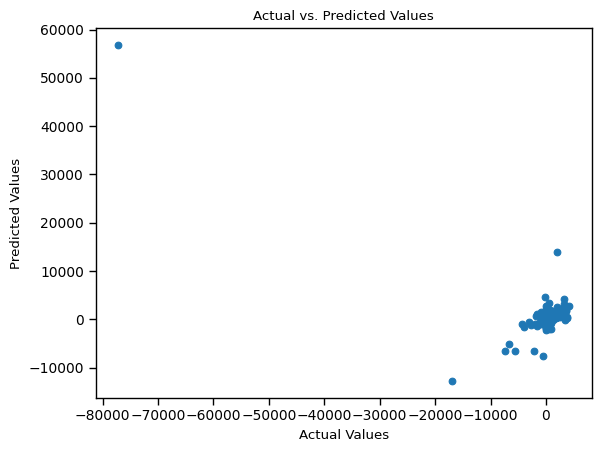

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [39]:
# 'scoring' can be 'neg_mean_squared_error' for regression
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Display cross-validation scores
print("Cross-Validation Scores:", -cross_val_scores)
print("Mean CV Score:", -cross_val_scores.mean())

Cross-Validation Scores: [122763.03092013  11205.95549921  35926.77022936   7655.17147113
 541286.68452769]
Mean CV Score: 143767.5225295042
